# Energy of Infinitely Long Cylindrically Symmetric System by Thorne
##  Geoff Cope
##  Univeristy of Utah
##  December 24, 2021 Christmas Eve!

Here we calculate tensors for metric 48 which when omega equals zero will reduce down to metric 6 and 36.  Field Equations in the paper are listed as equation 50.  Will go back and calculate other tensors another time.

https://authors.library.caltech.edu/3212/

https://journals.aps.org/pr/abstract/10.1103/PhysRev.138.B251

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,phi,z,dt,dr,dphi,dz = symbols('t r phi z dt dr dphi dz')

In [4]:
gamma, psi, omega = symbols('gamma psi omega')

In [5]:
gamma = Function('gamma')(t,r)
gamma

In [6]:
psi = Function('psi')(t,r)
psi

In [7]:
omega = Function('omega')(t,r)
omega

In [8]:
variables = Matrix([t,r,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [9]:
differentials = Matrix([dt,dr,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [10]:
lineElement = expand(exp(2*(gamma-psi)) * (dt**2 -dr**2) - exp(2*psi)*(dz + omega * dphi)**2 - r**2 * exp(-2*psi)*dphi**2 )
lineElement

In [11]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅γ(t, r)  -2⋅ψ(t, r)                                                                     
⎢ℯ         ⋅ℯ                       0                               0                       
⎢                                                                                           
⎢                          2⋅γ(t, r)  -2⋅ψ(t, r)                                            
⎢          0             -ℯ         ⋅ℯ                              0                       
⎢                                                                                           
⎢                                                    2  -2⋅ψ(t, r)    2        2⋅ψ(t, r)    
⎢          0                        0             - r ⋅ℯ           - ω (t, r)⋅ℯ           -ω
⎢                                                                                           
⎢                                                                    2⋅ψ(t, r)              
⎣          0                        0                      -ω(t, r)⋅ℯ 

In [12]:
import sympy

In [13]:
m = sympy.Array(g)
m

⎡ 2⋅γ(t, r)  -2⋅ψ(t, r)                                                                     
⎢ℯ         ⋅ℯ                       0                               0                       
⎢                                                                                           
⎢                          2⋅γ(t, r)  -2⋅ψ(t, r)                                            
⎢          0             -ℯ         ⋅ℯ                              0                       
⎢                                                                                           
⎢                                                    2  -2⋅ψ(t, r)    2        2⋅ψ(t, r)    
⎢          0                        0             - r ⋅ℯ           - ω (t, r)⋅ℯ           -ω
⎢                                                                                           
⎢                                                                    2⋅ψ(t, r)              
⎣          0                        0                      -ω(t, r)⋅ℯ 

In [14]:
from einsteinpy.symbolic import *

In [15]:
syms = sympy.symbols("t r phi z")
t,r,phi,z = syms

In [16]:
metric = MetricTensor(m,syms)

In [17]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(t, r)) - ──(ψ(t, r))  ──(γ(t, r)) - ──(ψ(t, r))                                      
⎢⎢∂t            ∂t           ∂r            ∂r                                               
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(t, r)) - ──(ψ(t, r))  ──(γ(t, r)) - ──(ψ(t, r))                                      
⎢⎢∂r            ∂r           ∂t            ∂t                         

In [18]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                               ∂           
⎢  2              2              2                           2     2            ──(γ(t, r)) 
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂r          
⎢───(γ(t, r)) - ───(γ(t, r)) - ───(ψ(t, r)) - 2⋅⎜──(ψ(t, r))⎟  + ───(ψ(t, r)) + ─────────── 
⎢  2              2              2              ⎝∂t         ⎠      2                 r      
⎢∂r             ∂t             ∂r                                ∂t                         
⎢                                                                                           
⎢                                                                                           
⎢                                                         ∂              4⋅ψ(t, r) ∂        
⎢                                                         ──(γ(t, r)) 

In [19]:
Ric.tensor()

⎡                                                                                           
⎢                                                                               ∂           
⎢  2              2              2                           2     2            ──(γ(t, r)) 
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂r          
⎢───(γ(t, r)) - ───(γ(t, r)) - ───(ψ(t, r)) - 2⋅⎜──(ψ(t, r))⎟  + ───(ψ(t, r)) + ─────────── 
⎢  2              2              2              ⎝∂t         ⎠      2                 r      
⎢∂r             ∂t             ∂r                                ∂t                         
⎢                                                                                           
⎢                                                                                           
⎢                                                         ∂              4⋅ψ(t, r) ∂        
⎢                                                         ──(γ(t, r)) 

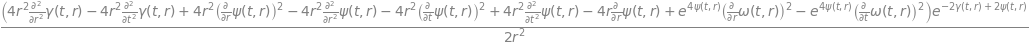

In [20]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [21]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                               ∂           
⎢  2              2              2                           2     2            ──(γ(t, r)) 
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂r          
⎢───(γ(t, r)) - ───(γ(t, r)) - ───(ψ(t, r)) - 2⋅⎜──(ψ(t, r))⎟  + ───(ψ(t, r)) + ─────────── 
⎢  2              2              2              ⎝∂t         ⎠      2                 r      
⎢∂r             ∂t             ∂r                                ∂t                         
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [22]:
simplify(einst.tensor())

⎡                                                                                   2       
⎢                                        ∂                   4⋅ψ(t, r) ⎛∂          ⎞        
⎢               2                2   1.0⋅──(γ(t, r))   0.25⋅ℯ         ⋅⎜──(ω(t, r))⎟    0.25
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂r                            ⎝∂r         ⎠        
⎢- ⎜──(ψ(t, r))⎟  - ⎜──(ψ(t, r))⎟  + ─────────────── - ────────────────────────────── - ────
⎢  ⎝∂r         ⎠    ⎝∂t         ⎠           r                         2                     
⎢                                                                    r                      
⎢                                                                                           
⎢                                                                                           
⎢                                                 ∂              4⋅ψ(t, r) ∂           ∂    
⎢                                                 ──(γ(t, r))   ℯ     

In [23]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [24]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

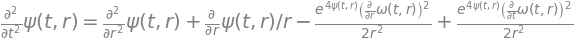

In [47]:
equation50a = Eq(diff(psi,t,t),expand(solve( Ric.tensor()[3,3].args[1], diff(psi,t,t) )[0]))
equation50a

In [38]:
equation50c = Eq( diff(gamma,r),expand(solve( simplify( Ric.tensor()[0,0] + Ric.tensor()[1,1] ) , diff(gamma,r) )[0]) )
equation50c

In [73]:
equation50d = Eq(  diff(gamma,t),solve( Ric.tensor()[1,0], diff(gamma,t) )[0] ) 
equation50d

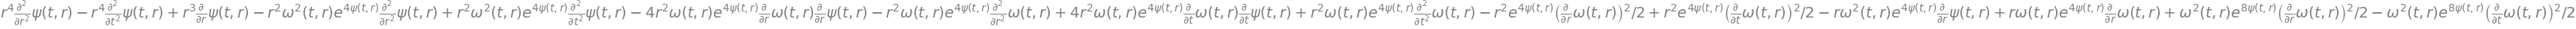

In [55]:
Ric.tensor()[2,2].args[1] 

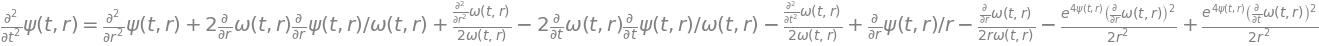

In [60]:
psitt = Eq(diff(psi,t,t),expand(solve( Ric.tensor()[2,3].args[2] , diff(psi,t,t) )[0]) )
psitt

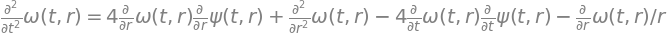

In [71]:
equation50b = Eq(diff(omega,t,t),solve( simplify(Ric.tensor()[2,2].args[1].subs(psitt.args[0],psitt.args[1])), diff(omega,t,t))[0])
equation50b

In [75]:
vacuumFieldEquations = Matrix([equation50a,equation50b,equation50c,equation50d])
vacuumFieldEquations 

⎡                                                                        2                  
⎢                                  ∂              4⋅ψ(t, r) ⎛∂          ⎞     4⋅ψ(t, r) ⎛∂  
⎢      2              2            ──(ψ(t, r))   ℯ         ⋅⎜──(ω(t, r))⎟    ℯ         ⋅⎜──(
⎢     ∂              ∂             ∂r                       ⎝∂r         ⎠               ⎝∂t 
⎢    ───(ψ(t, r)) = ───(ψ(t, r)) + ─────────── - ───────────────────────── + ───────────────
⎢      2              2                 r                      2                           2
⎢    ∂t             ∂r                                      2⋅r                         2⋅r 
⎢                                                                                           
⎢                                                                                          ∂
⎢      2                                          2                                        ─
⎢     ∂               ∂           ∂              ∂               ∂    